In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity ="all"

import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

In [2]:
like = pd.read_csv('/like.csv')
followlike = pd.read_csv('/follow.csv')
followback = pd.read_csv('/followback.csv')

In [3]:
like.info()
like.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1893 entries, 0 to 1892
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    1812 non-null   object
 1   from    1865 non-null   object
dtypes: object(2)
memory usage: 29.7+ KB


,name,from
0,onceuponabento,litaloveslunch
1,lunchwithsebastian,lunch_obsessed
2,flavioportino,homecookingcollective
3,forevernomadssueandbaz,school_lunchbox_inspo
4,kitchenkathukutty,recipes


In [4]:
like = like.dropna(axis=0,how='any')
like.head(10)
like.info()

,name,from
0,onceuponabento,litaloveslunch
1,lunchwithsebastian,lunch_obsessed
2,flavioportino,homecookingcollective
3,forevernomadssueandbaz,school_lunchbox_inspo
4,kitchenkathukutty,recipes
5,busypeopleeat,bentoboxlunch
6,mtneborailwaycarriage,thatlunchboxmom
7,joshi.anuja24,recipeoftheday
8,ilovelunches,lunch_obsessed
9,true_california,homecookingcollective


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1807 entries, 0 to 1892
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    1807 non-null   object
 1   from    1807 non-null   object
dtypes: object(2)
memory usage: 42.4+ KB


In [5]:
len(np.unique(like['name']))

636

In [6]:
print(like[like["name"].duplicated()])

                               name                     from
20                brookes_fun_bento    chrisnicol_lunchboxes
31                       grubgrub23          thatlunchboxmom
44                       grubgrub23          thatlunchboxmom
48           kiddiefoodieadventures               lunchideas
61    jenny_loves_cooking_n_fashion  fortheloveof_lunchboxes
...                             ...                      ...
1886               stephmichelle123  fortheloveof_lunchboxes
1887                     laura_bruj             tavvakitchen
1890                  the.bluebento    chrisnicol_lunchboxes
1891                         941srq          thatlunchboxmom
1892         kiddiefoodieadventures  fortheloveof_lunchboxes

[1171 rows x 2 columns]


In [7]:
df=like['name'].value_counts()
df=df.to_frame()
df = df.reset_index()
df.columns = ['name','likes']
#df.head()

In [8]:
df.head()

,name,likes
0,kiddiefoodieadventures,23
1,lunchlifemama,20
2,teukoapp,19
3,mycutiesfunfoods,17
4,mybento_aus,17


In [9]:
like =pd.merge(like,df,on='name')
like.head()

,name,from,likes
0,onceuponabento,litaloveslunch,6
1,onceuponabento,litaloveslunch,6
2,onceuponabento,litaloveslunch,6
3,onceuponabento,litaloveslunch,6
4,onceuponabento,litaloveslunch,6


In [10]:
like = like.drop_duplicates('name', keep='first')
like.head()

,name,from,likes
0,onceuponabento,litaloveslunch,6
6,lunchwithsebastian,lunch_obsessed,12
18,flavioportino,homecookingcollective,9
27,forevernomadssueandbaz,school_lunchbox_inspo,8
35,kitchenkathukutty,recipes,1


In [11]:
like['follow'] = 0
like.head()

,name,from,likes,follow
0,onceuponabento,litaloveslunch,6,0
6,lunchwithsebastian,lunch_obsessed,12,0
18,flavioportino,homecookingcollective,9,0
27,forevernomadssueandbaz,school_lunchbox_inspo,8,0
35,kitchenkathukutty,recipes,1,0


In [12]:
like.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 636 entries, 0 to 1806
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    636 non-null    object
 1   from    636 non-null    object
 2   likes   636 non-null    int64 
 3   follow  636 non-null    int64 
dtypes: int64(2), object(2)
memory usage: 24.8+ KB


In [13]:
followlike.info()
followlike.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1220 entries, 0 to 1219
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   from    1220 non-null   object
 1   likes   496 non-null    object
 2   name    1220 non-null   object
dtypes: object(3)
memory usage: 28.7+ KB


,from,likes,name
0,homeschoollunchtime,NaN,lynn9823
1,bento_box_lunches,NaN,sunshine_and_sandwiches
2,foodfitforkids,NaN,fauxmoccs
3,bento_box_lunches,NaN,tiffaneyfrancis1969
4,lunch_ideasforkids,NaN,malunchboxdujour


In [14]:
len(np.unique(followlike['name']))

1220

In [15]:
followlike = followlike.replace('2 likes', 2) 
followlike = followlike.replace('1 like', 1) 
followlike = followlike.fillna(value=0)

In [16]:
followlike['follow'] = 1

In [17]:
followlike.head()

,from,likes,name,follow
0,homeschoollunchtime,0.0,lynn9823,1
1,bento_box_lunches,0.0,sunshine_and_sandwiches,1
2,foodfitforkids,0.0,fauxmoccs,1
3,bento_box_lunches,0.0,tiffaneyfrancis1969,1
4,lunch_ideasforkids,0.0,malunchboxdujour,1


In [18]:
print(followlike['from'].value_counts())

lunch_ideasforkids         127
bento_box_lunches           94
bentolunchboxmums           92
bentoboxforkids             87
es_lunchbox                 84
kids_food_inspo             83
homeschoollunchtime         74
pickyhealthylunchbox        72
cleaneatmagz                72
pascalestable               72
the_greedy_ginger           66
foodfitforkids              57
bento_lunch_uk              57
moniquecormacknutrition     57
brookes_fun_bento           50
yummy_umami                 45
familyhomecook              31
Name: from, dtype: int64


In [19]:
print(like['from'].value_counts())

healthyrecipes             68
bentoboxlunch              62
lunchinspo                 59
recipeideas                50
recipeoftheday             50
recipes                    49
lunchbox                   47
lunchideas                 44
homecookingcollective      38
thatlunchboxmom            30
lunchboxinspiration        28
lunch_obsessed             26
fortheloveof_lunchboxes    24
chrisnicol_lunchboxes      21
tavvakitchen               10
school_lunchbox_inspo      10
bento_box_lunches          10
litaloveslunch             10
Name: from, dtype: int64


In [20]:
merge = followlike.append(like)

In [21]:
merge.info()
merge.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1856 entries, 0 to 1806
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   from    1856 non-null   object 
 1   likes   1856 non-null   float64
 2   name    1856 non-null   object 
 3   follow  1856 non-null   int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 72.5+ KB


,from,likes,name,follow
0,homeschoollunchtime,0.0,lynn9823,1
1,bento_box_lunches,0.0,sunshine_and_sandwiches,1
2,foodfitforkids,0.0,fauxmoccs,1
3,bento_box_lunches,0.0,tiffaneyfrancis1969,1
4,lunch_ideasforkids,0.0,malunchboxdujour,1


In [22]:
merge.head()

,from,likes,name,follow
0,homeschoollunchtime,0.0,lynn9823,1
1,bento_box_lunches,0.0,sunshine_and_sandwiches,1
2,foodfitforkids,0.0,fauxmoccs,1
3,bento_box_lunches,0.0,tiffaneyfrancis1969,1
4,lunch_ideasforkids,0.0,malunchboxdujour,1


In [23]:
print(merge[merge["name"].duplicated()])

                         from  likes                    name  follow
0              litaloveslunch    6.0          onceuponabento       0
6              lunch_obsessed   12.0      lunchwithsebastian       0
43             lunch_obsessed    4.0            ilovelunches       0
132   fortheloveof_lunchboxes    5.0                rca_made       0
149                lunchinspo    1.0               momztries       0
156            litaloveslunch   16.0          lunch_obsessed       0
195   fortheloveof_lunchboxes    8.0   little_hungry_tummies       0
203                lunchideas   23.0  kiddiefoodieadventures       0
233            lunch_obsessed    8.0   naijacanadianbentomom       0
241            lunch_obsessed   17.0         my.twinado.life       0
258     chrisnicol_lunchboxes   16.0   school_lunchbox_inspo       0
298   fortheloveof_lunchboxes    6.0          michellej_ayne       0
319            lunch_obsessed   17.0             mybento_aus       0
349            lunch_obsessed    8

In [24]:
followback.head()

,name
0,avah.o.isaac
1,i.jnourishlift
2,dineandrun
3,themamamaven
4,jessica.hanlon.official


In [25]:
followback_id = list(followback['name'] )

In [26]:
follow_back = []
for i in merge['name']:
    if i in followback_id:
        follow_back.append(1)
    else:
        follow_back.append(0)
arr = np.array(follow_back)
merge['followback'] = arr

In [27]:
#calculate people who we didn't interact with but followed us
Naturalfollower = 0
merge_id = list(merge['name'] )
for i in followback['name']:
    if i not in merge_id:
        Naturalfollower +=  1
print(Naturalfollower)

32


In [28]:
merge.head(100)

,from,likes,name,follow,followback
0,homeschoollunchtime,0.0,lynn9823,1,0
1,bento_box_lunches,0.0,sunshine_and_sandwiches,1,0
2,foodfitforkids,0.0,fauxmoccs,1,0
3,bento_box_lunches,0.0,tiffaneyfrancis1969,1,1
4,lunch_ideasforkids,0.0,malunchboxdujour,1,0
...,...,...,...,...,...
95,pickyhealthylunchbox,0.0,dmhyr,1,0
96,pascalestable,0.0,momoshares,1,0
97,cleaneatmagz,0.0,dee_macee,1,0
98,bento_lunch_uk,2.0,noahs.nibbles,1,0


In [29]:
print(merge[merge["name"].duplicated()])

                         from  likes                    name  follow  \
0              litaloveslunch    6.0          onceuponabento       0   
6              lunch_obsessed   12.0      lunchwithsebastian       0   
43             lunch_obsessed    4.0            ilovelunches       0   
132   fortheloveof_lunchboxes    5.0                rca_made       0   
149                lunchinspo    1.0               momztries       0   
156            litaloveslunch   16.0          lunch_obsessed       0   
195   fortheloveof_lunchboxes    8.0   little_hungry_tummies       0   
203                lunchideas   23.0  kiddiefoodieadventures       0   
233            lunch_obsessed    8.0   naijacanadianbentomom       0   
241            lunch_obsessed   17.0         my.twinado.life       0   
258     chrisnicol_lunchboxes   16.0   school_lunchbox_inspo       0   
298   fortheloveof_lunchboxes    6.0          michellej_ayne       0   
319            lunch_obsessed   17.0             mybento_aus    

In [30]:
#count total likes each unique user received
likesnumber = merge.groupby(['name'], sort=False)['likes'].sum().reset_index()
likesnumber.head()

,name,likes
0,lynn9823,0.0
1,sunshine_and_sandwiches,0.0
2,fauxmoccs,0.0
3,tiffaneyfrancis1969,0.0
4,malunchboxdujour,1.0


In [31]:
#check duplicate(none)
print(likesnumber[likesnumber["name"].duplicated()])

Empty DataFrame
Columns: [name, likes]
Index: []


In [32]:
#delete the duplicate users in merge dataset
merge = merge.drop_duplicates('name', keep='first')
merge.head()

,from,likes,name,follow,followback
0,homeschoollunchtime,0.0,lynn9823,1,0
1,bento_box_lunches,0.0,sunshine_and_sandwiches,1,0
2,foodfitforkids,0.0,fauxmoccs,1,0
3,bento_box_lunches,0.0,tiffaneyfrancis1969,1,1
4,lunch_ideasforkids,0.0,malunchboxdujour,1,0


In [33]:
#delete the likes column in merge dataset
del merge['likes']
merge.head()

,from,name,follow,followback
0,homeschoollunchtime,lynn9823,1,0
1,bento_box_lunches,sunshine_and_sandwiches,1,0
2,foodfitforkids,fauxmoccs,1,0
3,bento_box_lunches,tiffaneyfrancis1969,1,1
4,lunch_ideasforkids,malunchboxdujour,1,0


In [34]:
merge =pd.merge(merge,likesnumber,on='name')
merge.head()
merge.info()

,from,name,follow,followback,likes
0,homeschoollunchtime,lynn9823,1,0,0.0
1,bento_box_lunches,sunshine_and_sandwiches,1,0,0.0
2,foodfitforkids,fauxmoccs,1,0,0.0
3,bento_box_lunches,tiffaneyfrancis1969,1,1,0.0
4,lunch_ideasforkids,malunchboxdujour,1,0,1.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1797 entries, 0 to 1796
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   from        1797 non-null   object 
 1   name        1797 non-null   object 
 2   follow      1797 non-null   int64  
 3   followback  1797 non-null   int64  
 4   likes       1797 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 84.2+ KB


In [35]:
merge_clear = merge.drop(merge[(merge['from']=='lunchbox')|(merge['from']=='lunchboxinspiration')|
                              (merge['from']=='bentoboxlunch')|(merge['from']=='lunchinspo')|
                              (merge['from']=='recipes')|(merge['from']=='lunchideas')|
                              (merge['from']=='recipeideas')|(merge['from']=='recipeoftheday')|
                              (merge['from']=='healthyrecipes')].index)

In [36]:
merge_clear.head()
merge_clear.info()

,from,name,follow,followback,likes
0,homeschoollunchtime,lynn9823,1,0,0.0
1,bento_box_lunches,sunshine_and_sandwiches,1,0,0.0
2,foodfitforkids,fauxmoccs,1,0,0.0
3,bento_box_lunches,tiffaneyfrancis1969,1,1,0.0
4,lunch_ideasforkids,malunchboxdujour,1,0,1.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1347 entries, 0 to 1723
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   from        1347 non-null   object 
 1   name        1347 non-null   object 
 2   follow      1347 non-null   int64  
 3   followback  1347 non-null   int64  
 4   likes       1347 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 63.1+ KB


In [37]:
print(merge_clear['from'].value_counts())

lunch_ideasforkids         127
bento_box_lunches           97
bentolunchboxmums           92
bentoboxforkids             87
es_lunchbox                 84
kids_food_inspo             83
homeschoollunchtime         74
cleaneatmagz                72
pascalestable               72
pickyhealthylunchbox        72
the_greedy_ginger           66
bento_lunch_uk              57
foodfitforkids              57
moniquecormacknutrition     57
brookes_fun_bento           50
yummy_umami                 45
homecookingcollective       38
familyhomecook              31
thatlunchboxmom             30
chrisnicol_lunchboxes       15
lunch_obsessed              11
fortheloveof_lunchboxes     11
tavvakitchen                10
school_lunchbox_inspo        6
litaloveslunch               3
Name: from, dtype: int64


In [38]:
merge_clear= merge_clear.replace('bentolunchboxmums', 2177)
merge_clear= merge_clear.replace('bento_lunch_uk',1113)
merge_clear= merge_clear.replace('lunch_ideasforkids',513)
merge_clear= merge_clear.replace('pascalestable',2772)
merge_clear= merge_clear.replace('bentoboxforkids',3841)
merge_clear= merge_clear.replace('foodfitforkids',4640)
merge_clear= merge_clear.replace('es_lunchbox',635)
merge_clear= merge_clear.replace('homeschoollunchtime',250)
merge_clear= merge_clear.replace('pickyhealthylunchbox',727)
merge_clear= merge_clear.replace('brookes_fun_bento',311)
merge_clear= merge_clear.replace('tavvakitchen',2361)
merge_clear= merge_clear.replace('homecookingcollective',4190)
merge_clear= merge_clear.replace('thatlunchboxmom',4423)
merge_clear= merge_clear.replace('school_lunchbox_inspo',1152)
merge_clear= merge_clear.replace('litaloveslunch',1110)
merge_clear= merge_clear.replace('cleaneatmagz',29000)
merge_clear= merge_clear.replace('bento_box_lunches',8690)
merge_clear= merge_clear.replace('fortheloveof_lunchboxes',455)
merge_clear= merge_clear.replace('brookes_fun_bento',314)
merge_clear= merge_clear.replace('lunch_obsessed',712)
merge_clear= merge_clear.replace('chrisnicol_lunchboxes',253)
merge_clear= merge_clear.replace('moniquecormacknutrition',27000)
merge_clear= merge_clear.replace('familyhomecook',21000)
merge_clear= merge_clear.replace('yummy_umami',21000)
merge_clear= merge_clear.replace('kids_food_inspo',7874)
merge_clear= merge_clear.replace('the_greedy_ginger',13000)
#merge_clear= merge_clear.replace('',)


totaluser = 2177+1113+513+2772+3841+4640+635+250+727+311+2361+4190+4423+1152+1110+29000+8690+455+314+712+253+27000+21000+21000+7874+13000
totaluser

159513

In [39]:
merge_clear=merge_clear.reset_index()

In [40]:
del merge_clear['index']
merge_clear.head(1000)

,from,name,follow,followback,likes
0,250,lynn9823,1,0,0.0
1,8690,sunshine_and_sandwiches,1,0,0.0
2,4640,fauxmoccs,1,0,0.0
3,8690,tiffaneyfrancis1969,1,1,0.0
4,513,malunchboxdujour,1,0,1.0
...,...,...,...,...,...
995,635,joyslittlelunches,1,1,2.0
996,311,bentojaponaise,1,0,10.0
997,3841,angeliqueforess,1,0,0.0
998,250,carre_terras,1,0,0.0


In [41]:
merge_clear.head()

,from,name,follow,followback,likes
0,250,lynn9823,1,0,0.0
1,8690,sunshine_and_sandwiches,1,0,0.0
2,4640,fauxmoccs,1,0,0.0
3,8690,tiffaneyfrancis1969,1,1,0.0
4,513,malunchboxdujour,1,0,1.0


In [42]:
likeornot = []
for i in merge_clear['likes']:
    if i > 0:
        likeornot.append(1)
    else:
        likeornot.append(0)
arr = np.array(likeornot)
merge_clear['likeornot'] = likeornot

In [43]:
merge_clear.head()

,from,name,follow,followback,likes,likeornot
0,250,lynn9823,1,0,0.0,0
1,8690,sunshine_and_sandwiches,1,0,0.0,0
2,4640,fauxmoccs,1,0,0.0,0
3,8690,tiffaneyfrancis1969,1,1,0.0,0
4,513,malunchboxdujour,1,0,1.0,1


In [44]:
merge_clear.to_csv('output.csv')

In [45]:
t_3 = pd.DataFrame(columns = ['followback','notfollowback','sum'],index = ['like','notlike','sum'],
                 data=[[37,317,354],[42,368,410],[18244,4899,764]])
t_3

,followback,notfollowback,sum
like,37,317,354
notlike,42,368,410
sum,18244,4899,764


In [46]:
from scipy import stats
observed = t_3[['followback','notfollowback']]
stats.chi2_contingency(observed=observed) 

(1938.0631654387078,
 0.0,
 2,
 array([[  271.31559794,    82.68440206],
        [  314.23557954,    95.76442046],
        [17737.44882252,  5405.55117748]]))

In [47]:
new = merge_clear
del new['name']

In [48]:
new.head()
new.info()

,from,follow,followback,likes,likeornot
0,250,1,0,0.0,0
1,8690,1,0,0.0,0
2,4640,1,0,0.0,0
3,8690,1,1,0.0,0
4,513,1,0,1.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1347 entries, 0 to 1346
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   from        1347 non-null   int64  
 1   follow      1347 non-null   int64  
 2   followback  1347 non-null   int64  
 3   likes       1347 non-null   float64
 4   likeornot   1347 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 52.7 KB


In [49]:
add = totaluser - 1347
creat = np.zeros((add, 5))
creat = pd.DataFrame(creat)

In [50]:
creat.head()

,0,1,2,3,4
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0


In [51]:
creat.columns = ['from','follow','followback','likes','likeornot']
creat.head()

,from,follow,followback,likes,likeornot
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0


In [52]:
import random
fromlist = []
list = [2177,1113,513,2772,3841,4640,635,250,727,311,2361,4190,4423,1152,1110,29000,8690,455,314,712,253,27000,21000,21000,7874,13000]
for i in creat['from']:
    if i==0:
        a = random.choice(list)
        fromlist.append(a)
array = np.array(fromlist)
creat['from'] = array



In [53]:
creat.loc[0:Naturalfollower-1,'followback']=1
#creat.iloc[0:Naturalfollower]['followback']=1

In [54]:
creat.head(27)

,from,follow,followback,likes,likeornot
0,253,0.0,1.0,0.0,0.0
1,4423,0.0,1.0,0.0,0.0
2,2361,0.0,1.0,0.0,0.0
3,29000,0.0,1.0,0.0,0.0
4,7874,0.0,1.0,0.0,0.0
5,314,0.0,1.0,0.0,0.0
6,4423,0.0,1.0,0.0,0.0
7,311,0.0,1.0,0.0,0.0
8,4190,0.0,1.0,0.0,0.0
9,21000,0.0,1.0,0.0,0.0


In [55]:
creat.head()
creat.info()

,from,follow,followback,likes,likeornot
0,253,0.0,1.0,0.0,0.0
1,4423,0.0,1.0,0.0,0.0
2,2361,0.0,1.0,0.0,0.0
3,29000,0.0,1.0,0.0,0.0
4,7874,0.0,1.0,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158166 entries, 0 to 158165
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   from        158166 non-null  int64  
 1   follow      158166 non-null  float64
 2   followback  158166 non-null  float64
 3   likes       158166 non-null  float64
 4   likeornot   158166 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 6.0 MB


In [56]:
final=pd.concat([new,creat],axis=0)
final=final.reset_index()

In [57]:
del final['index']
final.head(2)
final.info()

,from,follow,followback,likes,likeornot
0,250,1.0,0.0,0.0,0.0
1,8690,1.0,0.0,0.0,0.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159513 entries, 0 to 159512
Data columns (total 5 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   from        159513 non-null  int64  
 1   follow      159513 non-null  float64
 2   followback  159513 non-null  float64
 3   likes       159513 non-null  float64
 4   likeornot   159513 non-null  float64
dtypes: float64(4), int64(1)
memory usage: 6.1 MB


In [58]:
print(final['followback'].value_counts())

0.0    159326
1.0       187
Name: followback, dtype: int64


In [59]:
final.to_csv('finaldataset.csv')

Text(0.5, 1.0, 'The Proportion of Followback Users')

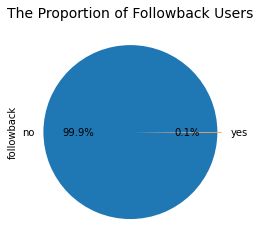

In [60]:
#calculate the count of streams in or out key playlist.
fb = final["followback"].value_counts()
labels = 'no', 'yes'

#pie chart plot
fb.plot.pie(autopct = '%1.1f%%',explode= [0,0.05], labels = labels)
plt.title("The Proportion of Followback Users",fontsize=14,weight=400)
plt.savefig('/Users/shuyuewang/Downloads/1.jpg')
plt.show()


Text(0.5, 1.0, 'The Proportion of Followback Users Who We Interacted With')

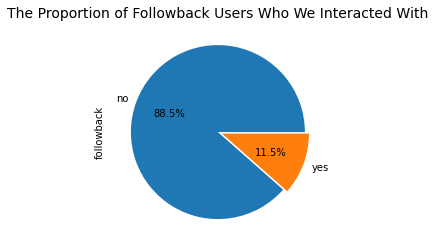

<Figure size 432x288 with 0 Axes>

In [61]:
#calculate the count of streams in or out key playlist.
Target = new["followback"].value_counts()
labels = 'no', 'yes'

#pie chart plot
Target.plot.pie(autopct = '%1.1f%%',explode= [0,0.05], labels = labels)
plt.title("The Proportion of Followback Users Who We Interacted With",fontsize=14,weight=400)
plt.show()
plt.savefig('/Users/shuyuewang/Downloads/1.png')

Text(0.5, 1.0, 'The Proportion of Followback Users Who We Followed')

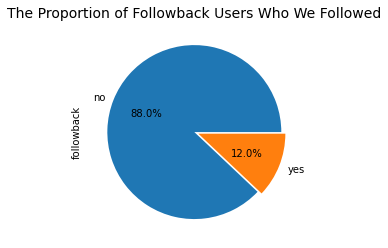

<Figure size 432x288 with 0 Axes>

In [62]:
dofollow = new[['followback','follow']]
dofollow = dofollow[dofollow['follow']==1]
dofo = dofollow['followback'].value_counts()
Labels = 'no', 'yes'

#pie chart plot
dofo.plot.pie(autopct = '%1.1f%%',explode= [0,0.05], labels = Labels)
plt.title("The Proportion of Followback Users Who We Followed",fontsize=14,weight=400)
plt.show()
plt.savefig('/Users/shuyuewang/Downloads/2.jpg')

Text(0.5, 1.0, 'The Proportion of Followback Users Who We Liked')

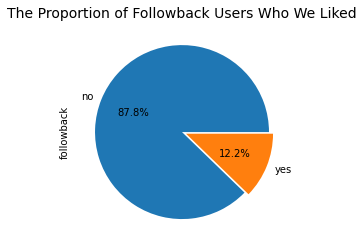

<Figure size 432x288 with 0 Axes>

In [63]:
dolike = new[['followback','likeornot','likes']]
dolike = dolike[dolike['likeornot']==1]
dolk = dolike['followback'].value_counts()
Labels = 'no', 'yes'

#pie chart plot
dolk.plot.pie(autopct = '%1.1f%%',explode= [0,0.05], labels = Labels)
plt.title("The Proportion of Followback Users Who We Liked",fontsize=14,weight=400)
plt.show()
plt.savefig('/Users/shuyuewang/Downloads/3.jpg')

Text(0.5, 1.0, 'The Proportion of Followback Users Who We Both Followed and Liked')

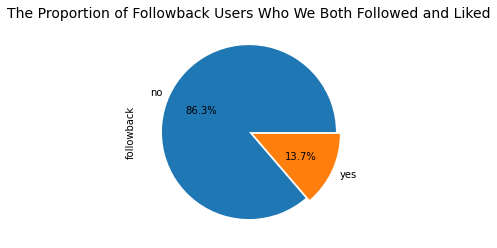

<Figure size 432x288 with 0 Axes>

In [64]:
folike = new[['followback','likeornot','likes','follow']]
folike = folike[folike['likeornot']==1]
folike = folike[folike['follow']==1]
folk = folike['followback'].value_counts()
Labels = 'no', 'yes'

#pie chart plot
folk.plot.pie(autopct = '%1.1f%%',explode= [0,0.05], labels = Labels)
plt.title("The Proportion of Followback Users Who We Both Followed and Liked",fontsize=14,weight=400)
plt.show()
plt.savefig('/Users/shuyuewang/Downloads/3.jpg')

Text(0.5, 1.0, 'The Followback Rate Based on Liked or Not')

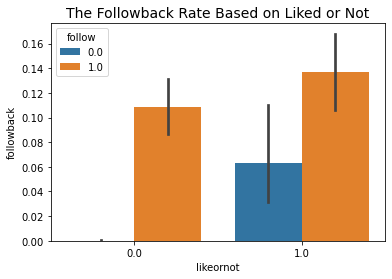

Text(0.5, 1.0, 'The Followback Rate Based on Followed or Not')

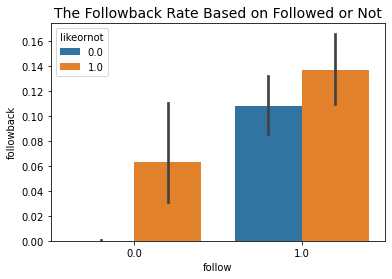

In [65]:
sns.barplot('likeornot','followback','follow', data=final)
plt.title("The Followback Rate Based on Liked or Not",fontsize=14,weight=400)
plt.show()
sns.barplot('follow','followback','likeornot', data=final)
plt.title("The Followback Rate Based on Followed or Not",fontsize=14,weight=400)
plt.show()

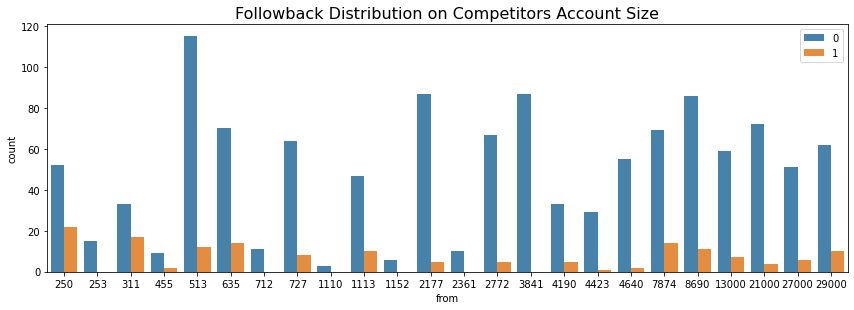

In [66]:
# will gender affect the play count of playlist 
fig = plt.figure(constrained_layout=False, figsize=(12,8))
ax1 = plt.subplot(2,1,1)

sns.countplot(ax=ax1,x=new["from"], hue=new["followback"],alpha=0.9)
ax1.set_title("Followback Distribution on Competitors Account Size",fontsize=16,weight=400)
ax1.legend(loc="upper right")

plt.tight_layout()   
plt.show();

<Figure size 864x432 with 0 Axes>

Text(0.5, 1.0, 'Density Plot of Fare for Surviving Population and Deceased Population')

[Text(0.5, 0, 'from')]

(0.0, 30000.0)

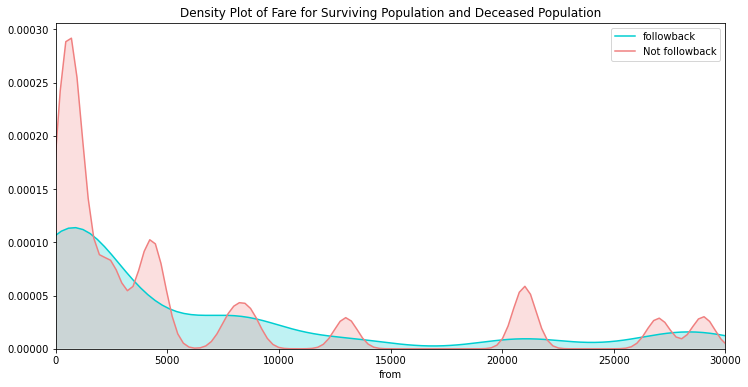

In [67]:
plt.figure(figsize=(12,6))
ax = sns.kdeplot(final["from"][final.followback == 1], color="darkturquoise", shade=True)
sns.kdeplot(final["from"][final.followback == 0], color="lightcoral", shade=True)
plt.legend(['followback', 'Not followback'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='from')
plt.xlim(0,30000)
plt.show()

Text(0.5, 1.0, 'Followback Distribution on Likes We Give')

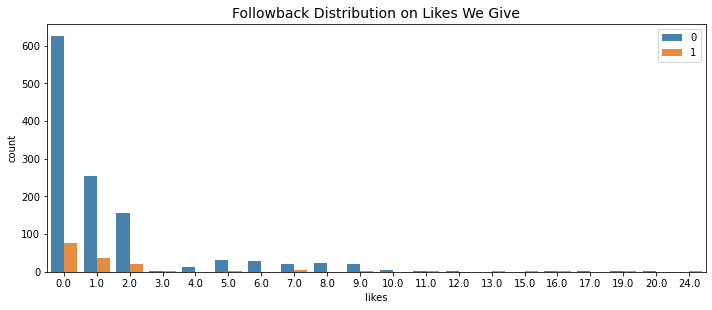

In [68]:
# will gender affect the play count of playlist 
fig = plt.figure(constrained_layout=False, figsize=(10,8))
ax1 = plt.subplot(2,1,1)

sns.countplot(ax=ax1,x=new["likes"], hue=new["followback"],alpha=0.9)
ax1.set_title("Followback Distribution on Likes We Give",fontsize=14,weight=400)
ax1.legend(loc="upper right")

plt.tight_layout()   
plt.show()



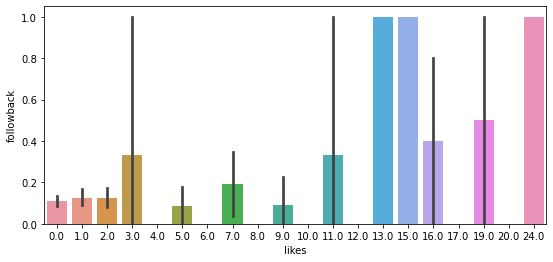

In [69]:
fig = plt.figure(constrained_layout=False, figsize=(9,4))
sns.barplot('likes','followback', data=new)
plt.show()

In [73]:
t1 = final[['followback','follow']]
#t1[t1['follow']==1].count()
#t1.head(100)
t1[t1['follow']==1].groupby('followback').count()
t1[t1['follow']==0].groupby('followback').count()
t_1 = pd.DataFrame(columns = ['Followback','NotFollowback','Sum'],index = ['Follow','NotFollow','Sum'],
                 data=[[147,1073,147+1073],[40,158253,40+158253],[147+40,1073+158253,159513]])
t_1
T1 = pd.DataFrame(columns = ['Followback','NotFollowback'],index = ['Follow','Notfollow'],
                 data=[[187*1220/159513,159326*1220/159513],[187*158293/159513,159326*158293/159513]])
T1
from scipy import stats
observed = t_1[['Followback','NotFollowback']]
stats.chi2_contingency(observed=observed)

,follow
followback,
0.0,1073
1.0,147


,follow
followback,
0.0,158253
1.0,40


,Followback,NotFollowback,Sum
Follow,147,1073,1220
NotFollow,40,158253,158293
Sum,187,159326,159513


,Followback,NotFollowback
Follow,1.430228,1218.569772
Notfollow,185.569772,158107.430228


(14947.922957933735,
 0.0,
 2,
 array([[1.43022826e+00, 1.21856977e+03],
        [1.85569772e+02, 1.58107430e+05],
        [1.87000000e+02, 1.59326000e+05]]))

In [75]:
t2 = final[['followback','likeornot']]

t2[t2['likeornot']==1].groupby('followback').count()
t2[t2['likeornot']==0].groupby('followback').count()
t_2 = pd.DataFrame(columns = ['Followback','NotFollowback','Sum'],index = ['Like','NotLike','Sum'],
                 data=[[79,566,79+566],[108,158760,108+158760],[79+108,566+158760,159513]])
t_2
T2 = pd.DataFrame(columns = ['Followback','NotFollowback'],index = ['Like','NotLike'],
                 data=[[187*645/159513,159326*645/159513],[187*158868/159513,159326*158868/159513]])
T2

fisher = pd.DataFrame([[72,567],[101,159222]])
from scipy.stats import fisher_exact
oddsr, p = fisher_exact(fisher)
print(f'pvalue = {p :.3f}')

,likeornot
followback,
0.0,566
1.0,79


,likeornot
followback,
0.0,158760
1.0,108


,Followback,NotFollowback,Sum
Like,79,566,645
NotLike,108,158760,158868
Sum,187,159326,159513


,Followback,NotFollowback
Like,0.756145,644.243855
NotLike,186.243855,158681.756145


pvalue = 0.000
